<a href="https://colab.research.google.com/github/SergeyHSE/PostsAnalysis.github.io/blob/main/VKPostsAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
file = files.upload()

Saving АгроАспект Плюс • Сити-фермерство_ записи сообщества _ ВКонтакте.xlsx to АгроАспект Плюс • Сити-фермерство_ записи сообщества _ ВКонтакте.xlsx


In [3]:
df = pd.read_excel('/content/АгроАспект Плюс • Сити-фермерство_ записи сообщества _ ВКонтакте.xlsx')
df.head()

,Title_URL,Дата публикации,Текст поста,Изображение,Лайки,Поделились,Кол-во просмотров
0,https://vk.com/wall-137838362_645,15 июл 2020,Контроллер для автоматизации гроубоксов и тепл...,NaN,98.0,5.0,7.5K
1,https://vk.com/wall-137838362_470,24 янв 2020,Будущее наступило: продукты будут выращивать п...,NaN,41.0,4.0,6.8K
2,https://vk.com/wall-137838362_603,24 мая 2020,Экобокс в гостях у программы Утренний экпресс ...,NaN,74.0,NaN,5.6K
3,https://vk.com/wall-137838362_573,25 апр 2020,Фото от клиента. #клубника на вертикальной фер...,NaN,51.0,2.0,4.8K
4,https://vk.com/wall-137838362_666,3 авг 2020,Прошло ещё 6 дней. Салаты выращиваемые на раст...,NaN,30.0,1.0,3.6K


In [4]:
df = df.drop(['Title_URL', 'Изображение'], axis=1)
df.head()

,Дата публикации,Текст поста,Лайки,Поделились,Кол-во просмотров
0,15 июл 2020,Контроллер для автоматизации гроубоксов и тепл...,98.0,5.0,7.5K
1,24 янв 2020,Будущее наступило: продукты будут выращивать п...,41.0,4.0,6.8K
2,24 мая 2020,Экобокс в гостях у программы Утренний экпресс ...,74.0,NaN,5.6K
3,25 апр 2020,Фото от клиента. #клубника на вертикальной фер...,51.0,2.0,4.8K
4,3 авг 2020,Прошло ещё 6 дней. Салаты выращиваемые на раст...,30.0,1.0,3.6K


In [5]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
stop_words = set(stopwords.words("russian"))

In [7]:
all_posts = ''.join(df['Текст поста'].dropna())

In [8]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [9]:
tokens = word_tokenize(all_posts)

In [10]:
filtered_tokens = [word.lower() for word in tokens if word.isalnum() and
                   word.lower() not in stop_words]

In [11]:
fdist = FreqDist(filtered_tokens)

In [12]:
additional_stop_words = ["это", "ещё", "которые", "очень", "почему", "сегодня",
                         "нужно", "поэтому", "также", "однако"]
filtered_tokens = [word for word in filtered_tokens if word not in additional_stop_words]

fdist_filtered = FreqDist(filtered_tokens)

In [13]:
print('Наиболее часто встречающиеся слова:')
for word, frequency in fdist_filtered.most_common(30):
  print(f'{word}: {frequency}')

Наиболее часто встречающиеся слова:
растений: 124
растения: 101
выращивания: 53
agroaspect: 49
растение: 47
vefur: 46
вертикальныефермы: 36
зелень: 35
света: 33
ecobox: 33
семена: 32
экобокс: 31
клубника: 31
листья: 31
зелени: 30
вкус: 28
гидропоника: 27
помогает: 27
ферме: 26
клубники: 26
показать: 25
выращивать: 25
вертикальной: 25
система: 25
использовать: 25
гидропонике: 24
свет: 23
фермы: 22
почвы: 22
вермикулит: 22


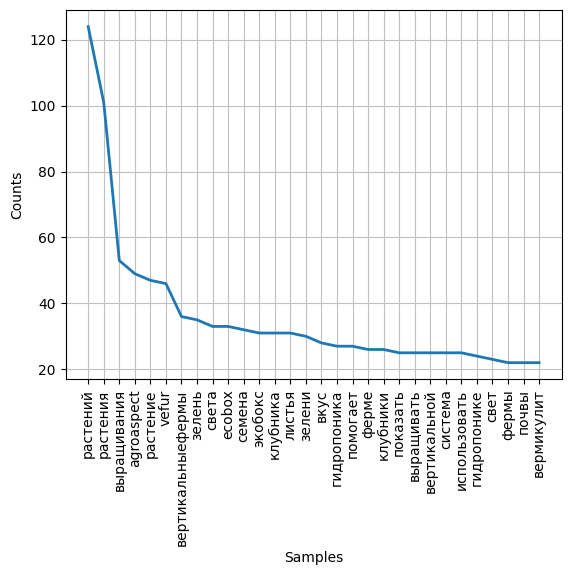

In [14]:
fdist_filtered.plot(30, cumulative=False)
plt.show()

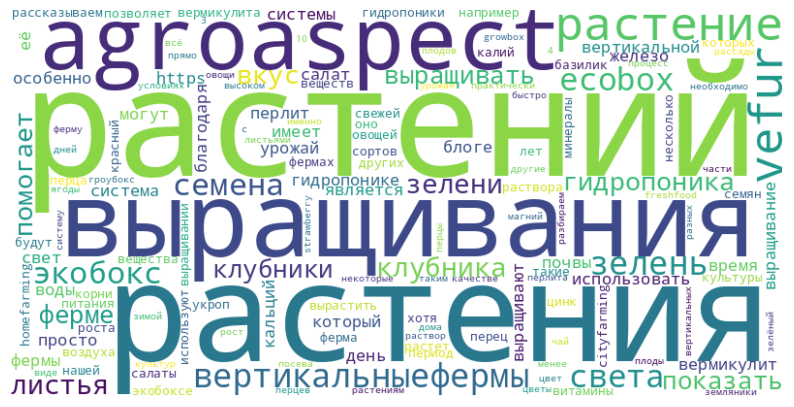

In [15]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, max_words=150,
                      background_color='white').generate_from_frequencies(fdist_filtered)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [16]:
df['Текст поста'].isnull().sum()

24

In [17]:
df['Текст поста'].fillna('', inplace=True)

In [18]:
def contains_berry(text):
    return "клубник" in text.lower() or "земляник" in text.lower()

df['Упоминание ягоды'] = df['Текст поста'].apply(contains_berry)

total_posts = len(df)
posts_with_berry = df['Упоминание ягоды'].sum()

print(f"Общее количество постов: {total_posts}")
print(f"Количество постов с упоминанием ягоды: {posts_with_berry}")
print(f"Процент постов с упоминанием ягоды: {(posts_with_berry / total_posts) * 100:.2f}%")

Общее количество постов: 492
Количество постов с упоминанием ягоды: 46
Процент постов с упоминанием ягоды: 9.35%


In [19]:
df['Лайки'].fillna(0, inplace=True)
df['Дата публикации'] = df['Дата публикации'].str.replace(' в ', ' ')
df['Дата публикации'] = df['Дата публикации'].str.replace('вчера', '1 дек')
df['Дата публикации'] = df['Дата публикации'].apply(lambda x: x.replace(x[-5:], '2023') if ':' in x else x)

In [20]:
months_mapping = {
    'янв': 'Jan',
    'фев': 'Feb',
    'мар': 'Mar',
    'апр': 'Apr',
    'мая': 'May',
    'июн': 'Jun',
    'июл': 'Jul',
    'авг': 'Aug',
    'сен': 'Sep',
    'окт': 'Oct',
    'ноя': 'Nov',
    'дек': 'Dec'
}

In [21]:
import re
df['Дата публикации'] = df['Дата публикации'].replace(months_mapping, regex=True)
df['Дата публикации'] = df['Дата публикации'].apply(lambda x: re.sub(r'(\b\w{3})(\d{4}\b)', r'\1 \2', x))

In [22]:
df['Дата публикации'] = pd.to_datetime(df['Дата публикации'])
df.sort_values(by='Дата публикации', inplace=True)

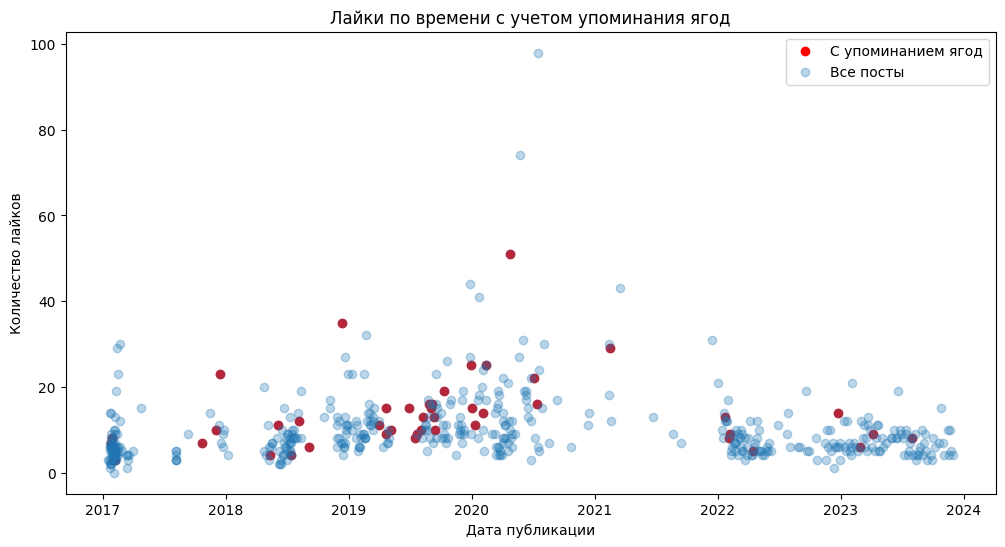

In [23]:
plt.figure(figsize=(12, 6), dpi=100)
plt.scatter(df[df['Упоминание ягоды']]['Дата публикации'],
            df[df['Упоминание ягоды']]['Лайки'],
            label='С упоминанием ягод', color='red', marker='o')
plt.scatter(df['Дата публикации'], df['Лайки'], alpha=0.3, label='Все посты', marker='o')
plt.title('Лайки по времени с учетом упоминания ягод')
plt.xlabel('Дата публикации')
plt.ylabel('Количество лайков')
plt.legend()
plt.show()

In [24]:
df['Кол-во просмотров'] = df['Кол-во просмотров'].str.replace('K', '000')
df['Кол-во просмотров'] = df['Кол-во просмотров'].str.replace('.', '')
df['Кол-во просмотров'] = pd.to_numeric(df['Кол-во просмотров'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 492 entries, 490 to 491
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Дата публикации    492 non-null    datetime64[ns]
 1   Текст поста        492 non-null    object        
 2   Лайки              492 non-null    float64       
 3   Поделились         217 non-null    float64       
 4   Кол-во просмотров  492 non-null    int64         
 5   Упоминание ягоды   492 non-null    bool          
dtypes: bool(1), datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 23.5+ KB


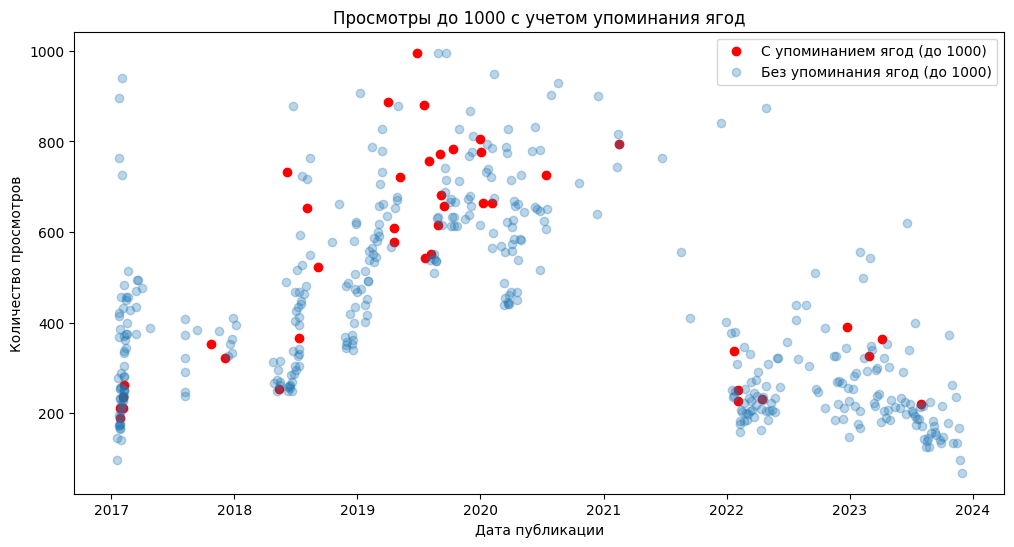

In [25]:
plt.figure(figsize=(12, 6))
plt.scatter(df[df['Упоминание ягоды'] & (df['Кол-во просмотров'] < 1000)]['Дата публикации'],
            df[df['Упоминание ягоды'] & (df['Кол-во просмотров'] < 1000)]['Кол-во просмотров'],
            label='С упоминанием ягод (до 1000)', color='red', marker='o')
plt.scatter(df[~df['Упоминание ягоды'] & (df['Кол-во просмотров'] < 1000)]['Дата публикации'],
            df[~df['Упоминание ягоды'] & (df['Кол-во просмотров'] < 1000)]['Кол-во просмотров'],
            alpha=0.3, label='Без упоминания ягод (до 1000)', marker='o')
plt.title('Просмотры до 1000 с учетом упоминания ягод')
plt.xlabel('Дата публикации')
plt.ylabel('Количество просмотров')
plt.legend()
plt.show()

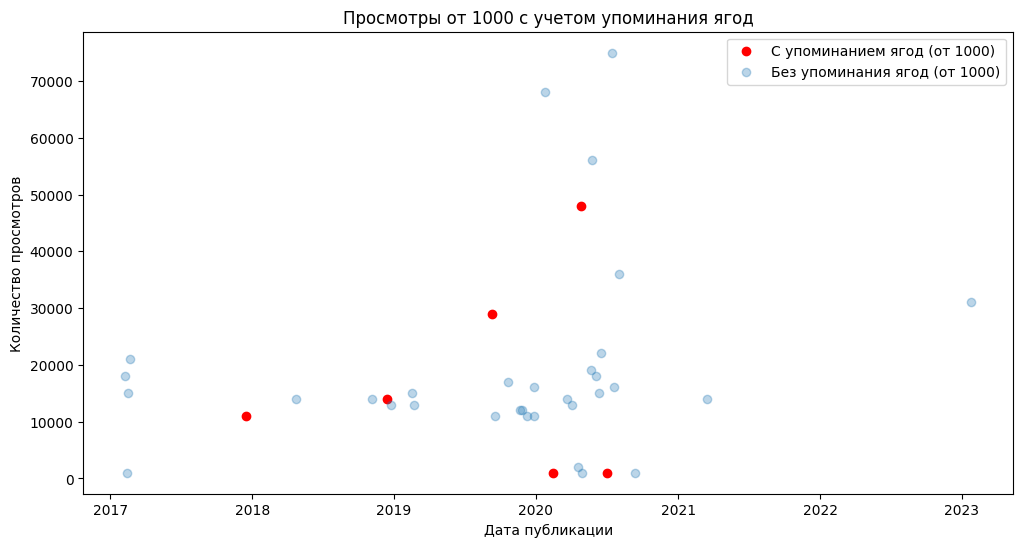

In [26]:
plt.figure(figsize=(12, 6))
plt.scatter(df[df['Упоминание ягоды'] & (df['Кол-во просмотров'] >= 1000)]['Дата публикации'],
            df[df['Упоминание ягоды'] & (df['Кол-во просмотров'] >= 1000)]['Кол-во просмотров'],
            label='С упоминанием ягод (от 1000)', color='red', marker='o')
plt.scatter(df[~df['Упоминание ягоды'] & (df['Кол-во просмотров'] >= 1000)]['Дата публикации'],
            df[~df['Упоминание ягоды'] & (df['Кол-во просмотров'] >= 1000)]['Кол-во просмотров'],
            alpha=0.3, label='Без упоминания ягод (от 1000)', marker='o')
plt.title('Просмотры от 1000 с учетом упоминания ягод')
plt.xlabel('Дата публикации')
plt.ylabel('Количество просмотров')
plt.legend()
plt.show()

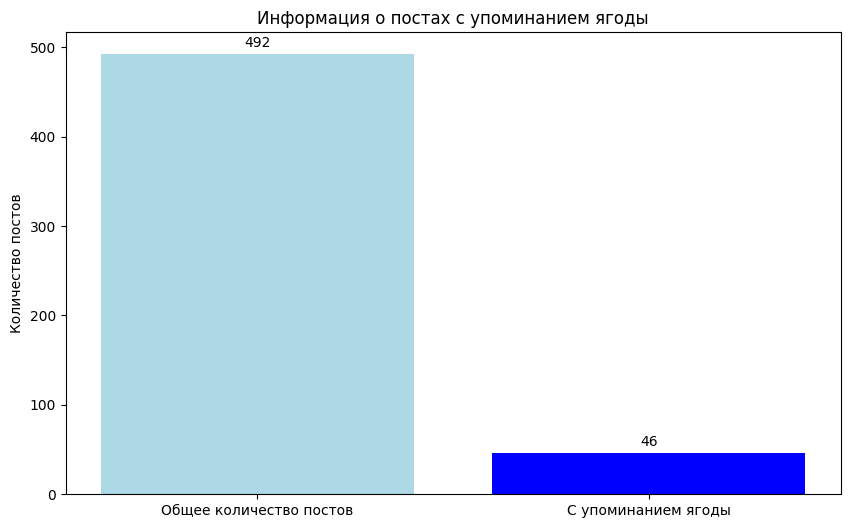

In [27]:
import seaborn as sns
followers_count = 929
plt.figure(figsize=(10, 6))
plt.bar(['Общее количество постов', 'С упоминанием ягоды'],
 [total_posts, posts_with_berry], color=['lightblue', 'blue'])
plt.text(0, total_posts + 20, f'{total_posts}', ha='center', va='top')
plt.text(1, posts_with_berry + 20, f'{posts_with_berry}', ha='center', va='top')
plt.ylabel('Количество постов')
plt.title('Информация о постах с упоминанием ягоды')
plt.show()